In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
womens_stats = pd.read_csv('wbb_stats.csv')

In [3]:
womens_stats.dtypes

Game_ID                              int64
Date_Of_Game                        object
Team_1                              object
Team_2                              object
Win_Or_Loss                         object
Half_Points                          int64
Points_Scored                        int64
First_Half_FGA                       int64
First_Half_FGM                       int64
First_Half_Assists                   int64
First_Half_Offensive_Rebounds        int64
First_Half_Turnovers                 int64
First_Half_FTA                       int64
First_Half_FTM                       int64
First_Half_Assist_Ratio            float64
First_Half_Offensive_Efficiency    float64
FGA                                  int64
FGM                                  int64
Three_Point_Attempts                 int64
Three_Point_Makes                    int64
Assists                              int64
Offensive_Rebounds                   int64
Turnovers                            int64
FTA        

In [4]:
womens_stats = womens_stats.replace(to_replace = ['Win','Loss'],value = ['1','0'])

In [5]:
womens_stats.dtypes

Game_ID                              int64
Date_Of_Game                        object
Team_1                              object
Team_2                              object
Win_Or_Loss                         object
Half_Points                          int64
Points_Scored                        int64
First_Half_FGA                       int64
First_Half_FGM                       int64
First_Half_Assists                   int64
First_Half_Offensive_Rebounds        int64
First_Half_Turnovers                 int64
First_Half_FTA                       int64
First_Half_FTM                       int64
First_Half_Assist_Ratio            float64
First_Half_Offensive_Efficiency    float64
FGA                                  int64
FGM                                  int64
Three_Point_Attempts                 int64
Three_Point_Makes                    int64
Assists                              int64
Offensive_Rebounds                   int64
Turnovers                            int64
FTA        

In [6]:
womens_stats['Win_Or_Loss'] = womens_stats['Win_Or_Loss'].astype(str).astype(int)

In [7]:
womens_stats.dtypes

Game_ID                              int64
Date_Of_Game                        object
Team_1                              object
Team_2                              object
Win_Or_Loss                          int32
Half_Points                          int64
Points_Scored                        int64
First_Half_FGA                       int64
First_Half_FGM                       int64
First_Half_Assists                   int64
First_Half_Offensive_Rebounds        int64
First_Half_Turnovers                 int64
First_Half_FTA                       int64
First_Half_FTM                       int64
First_Half_Assist_Ratio            float64
First_Half_Offensive_Efficiency    float64
FGA                                  int64
FGM                                  int64
Three_Point_Attempts                 int64
Three_Point_Makes                    int64
Assists                              int64
Offensive_Rebounds                   int64
Turnovers                            int64
FTA        

In [8]:
womens_stats_num = womens_stats.drop(columns = {'Date_Of_Game', 'Team_1', 'Team_2'})

In [9]:
womens_stats_num_without_game_id = womens_stats_num.drop(columns = {'Game_ID'})

In [10]:
womens_stats_num_without_game_id_corr = womens_stats_num_without_game_id.corr()

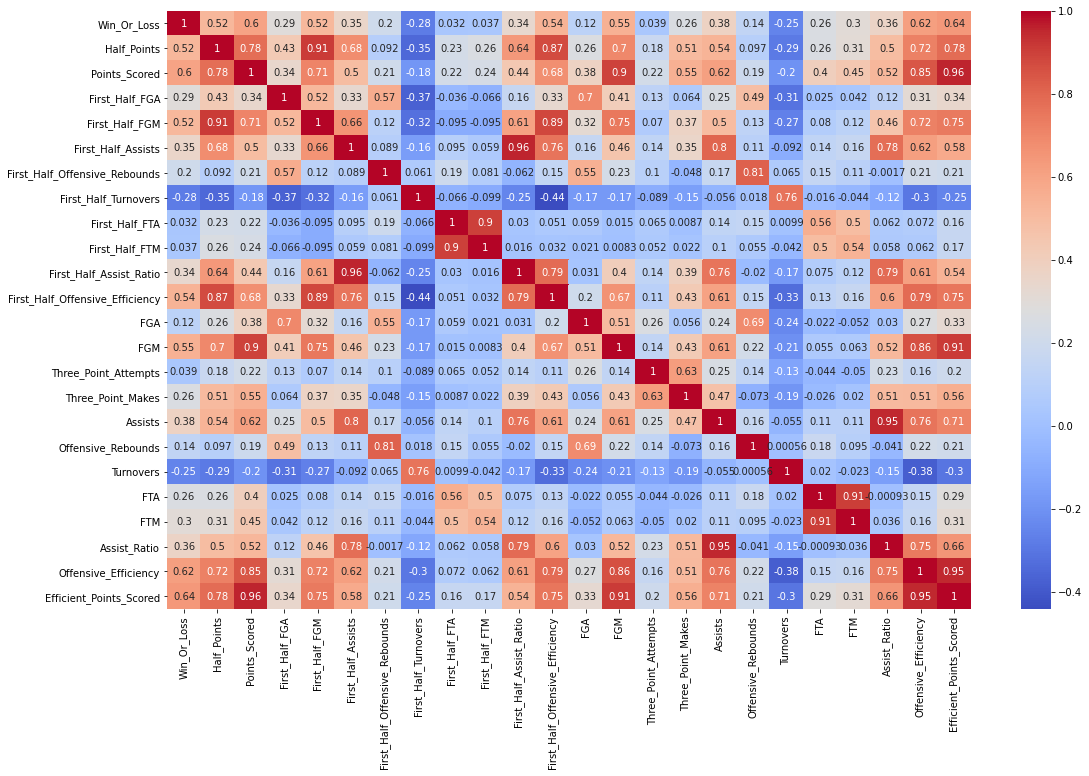

In [11]:
plt.figure(figsize=(18,11))
sns.heatmap(womens_stats_num_without_game_id_corr, annot = True, cmap = "coolwarm");

In [12]:
womens_stats.Team_1.unique()

array(['St. Scholastica', 'UWEC', 'Bethel', 'Simpson', 'Wartburg',
       'Carleton', 'Loras', 'St. Norbert', 'St. Catherine',
       'Framingham St.', 'Salve Regina', 'UWW', 'UWS', 'UWP', 'UWO',
       'UWSP', 'UWRF', 'UWL', 'Superior', 'Calvin', "St. Mary's",
       'St. Thomas', 'Augustana', 'DePauw', 'Ohio Northern', 'Alma',
       'Lawrence', 'Pacific Lutheran', 'Puget Sound', 'Ripon', 'Edgewood',
       'Bethany Lutheran', 'Carroll', 'Coe', 'Cornell', 'Luther',
       'Finlandia', 'Lake Forest', 'Viterbo', 'Washington',
       'Illinois Wesleyan', 'Northwestern', 'Dubuque', 'Salisbury',
       'Husson', 'North Central'], dtype=object)

In [13]:
womens_stats['Team_1_ID'] = womens_stats.groupby(['Team_1']).ngroup()

In [14]:
game = womens_stats.merge(womens_stats, how='inner', on='Game_ID')

In [15]:
game = game.drop_duplicates(['Game_ID'])
game = game.reset_index(drop = True)

In [16]:
game.dtypes

Game_ID                                int64
Date_Of_Game_x                        object
Team_1_x                              object
Team_2_x                              object
Win_Or_Loss_x                          int32
Half_Points_x                          int64
Points_Scored_x                        int64
First_Half_FGA_x                       int64
First_Half_FGM_x                       int64
First_Half_Assists_x                   int64
First_Half_Offensive_Rebounds_x        int64
First_Half_Turnovers_x                 int64
First_Half_FTA_x                       int64
First_Half_FTM_x                       int64
First_Half_Assist_Ratio_x            float64
First_Half_Offensive_Efficiency_x    float64
FGA_x                                  int64
FGM_x                                  int64
Three_Point_Attempts_x                 int64
Three_Point_Makes_x                    int64
Assists_x                              int64
Offensive_Rebounds_x                   int64
Turnovers_

In [17]:
game = game.rename(columns = {'Date_Of_Game_x': 'Date_Of_Game', 'Team_1_x': 'Team_x', 'Team_2_x' : 'Team_y', 'Team_1_ID_x': 'Team_x_ID', 'Team_1_ID_y': 'Team_y_ID'})
game = game.drop(columns = {'Team_1_y', 'Team_2_y', 'Date_Of_Game_y'})

In [18]:
game.dtypes

Game_ID                                int64
Date_Of_Game                          object
Team_x                                object
Team_y                                object
Win_Or_Loss_x                          int32
Half_Points_x                          int64
Points_Scored_x                        int64
First_Half_FGA_x                       int64
First_Half_FGM_x                       int64
First_Half_Assists_x                   int64
First_Half_Offensive_Rebounds_x        int64
First_Half_Turnovers_x                 int64
First_Half_FTA_x                       int64
First_Half_FTM_x                       int64
First_Half_Assist_Ratio_x            float64
First_Half_Offensive_Efficiency_x    float64
FGA_x                                  int64
FGM_x                                  int64
Three_Point_Attempts_x                 int64
Three_Point_Makes_x                    int64
Assists_x                              int64
Offensive_Rebounds_x                   int64
Turnovers_

In [19]:
game_num = game.drop(columns = {'Game_ID', 'Date_Of_Game', 'Team_x', 'Team_y', 'Team_x_ID', 'Team_y_ID'})

In [20]:
game_num_corr = game_num.corr().abs()
sorted_mat = pd.DataFrame(game_num_corr.unstack().sort_values(ascending = False).drop_duplicates())

In [21]:
highest_correlations = sorted_mat[sorted_mat[0] > 0.7]

In [22]:
highest_correlations

0
Win_Or_Loss_x                     Win_Or_Loss_x                      1.000000
First_Half_Assists_y              First_Half_Assist_Ratio_y          0.964193
Points_Scored_y                   Efficient_Points_Scored_y          0.953197
Assists_x                         Assist_Ratio_x                     0.944288
Assists_y                         Assist_Ratio_x                     0.944288
Efficient_Points_Scored_x         Offensive_Efficiency_y             0.943050
Half_Points_x                     First_Half_FGM_x                   0.927455
First_Half_FTA_x                  First_Half_FTM_y                   0.921460
Efficient_Points_Scored_x         FGM_y                              0.912287
                                  FGM_x                              0.912287
FGM_x                             Points_Scored_y                    0.907338
Points_Scored_y                   FGM_y                              0.907338
FTM_y                             FTA_y                              0.907196
First_Half_Offensive_Efficiency_x First_Half_FGM_y                   0.903374
Half_Points_y                     First_Half_Offensive_Efficiency_x  0.899405
First_Half_Offensive_Efficiency_y Half_Points_x                      0.899405
Offensive_Efficiency_x            FGM_y                              0.859128
Points_Scored_x                   Offensive_Efficiency_x             0.839787
Points_Scored_y                   Offensive_Efficiency_x             0.839787
Half_Points_x                     Efficient_Points_Scored_x          0.828763
Half_Points_y                     Efficient_Points_Scored_x          0.828763
Assists_y                         First_Half_Assists_y               0.828682
First_Half_Assists_y              Assists_x                          0.828682
Offensive_Efficiency_x            First_Half_Offensive_Efficiency_x  0.820523
First_Half_Offensive_Rebounds_x   Offensive_Rebounds_x               0.818015
First_Half_Assist_Ratio_y         Assist_Ratio_x                     0.807450
Assist_Ratio_y                    First_Half_Assist_Ratio_x          0.807450
First_Half_FGM_x                  FGM_x                              0.804282
First_Half_FGM_y                  FGM_x                              0.804282
Half_Points_y                     Points_Scored_x                    0.802548
First_Half_Assists_y              Assist_Ratio_y                     0.796837
First_Half_FGM_x                  Efficient_Points_Scored_x          0.796017
Assists_x                         First_Half_Assist_Ratio_y          0.787158
First_Half_Assist_Ratio_x         Assists_x                          0.787158
First_Half_Assist_Ratio_y         First_Half_Offensive_Efficiency_x  0.776934
First_Half_Offensive_Efficiency_y Efficient_Points_Scored_x          0.775741
Efficient_Points_Scored_x         First_Half_Offensive_Efficiency_x  0.775741
Offensive_Efficiency_y            Half_Points_x                      0.773675
Offensive_Efficiency_x            Half_Points_y                      0.773675
First_Half_FGM_y                  Offensive_Efficiency_y             0.773227
Offensive_Efficiency_x            First_Half_FGM_y                   0.773227
Half_Points_y                     FGM_x                              0.764459
                                  FGM_y                              0.764459
First_Half_Assists_y              First_Half_Offensive_Efficiency_x  0.752154
First_Half_Assists_x              First_Half_Offensive_Efficiency_x  0.752154
Points_Scored_y                   First_Half_FGM_y                   0.745894
First_Half_FGM_x                  Points_Scored_y                    0.745894
Offensive_Efficiency_y            Assists_y                          0.741563
First_Half_Turnovers_y            Turnovers_y                        0.731340
                                  Turnovers_x                        0.731340
First_Half_Offensive_Efficiency_y FGM_y                              0.727570
FGM_x               

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [24]:
base_features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y'})

In [25]:
X = base_features
X
y = game_num['Win_Or_Loss_x']

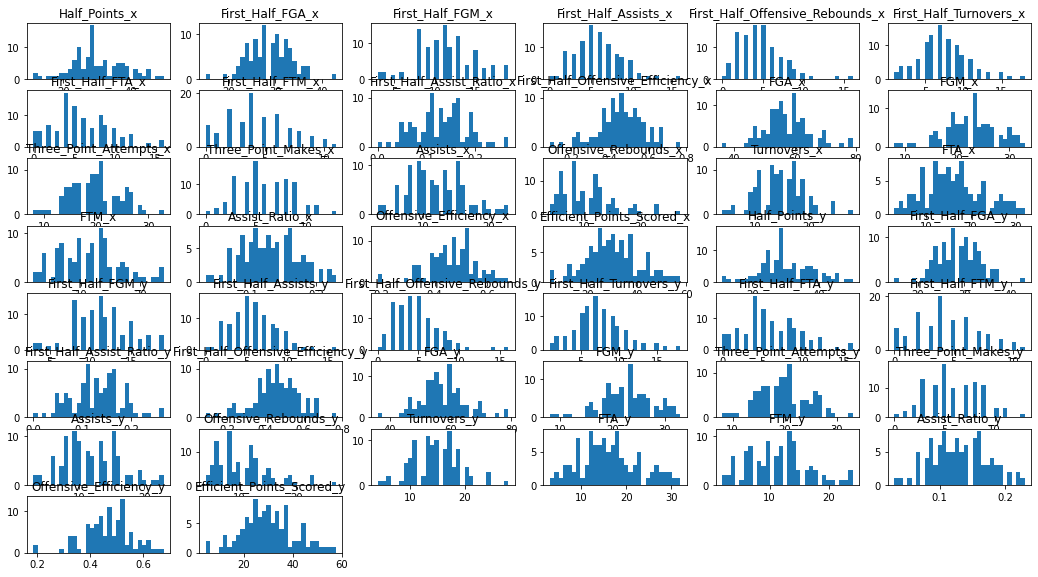

In [26]:
cols = list(X)
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)
for i in range(len(cols)):
    plt.subplot(9, 6, i+1)
    plt.hist(X[cols[i]], bins=30)
    plt.title(cols[i])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 )

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
standarized_X = scaler.transform(X_train)
standarized_X_test = scaler.transform(X_test)

In [29]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X_train)
normalized_X = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [30]:
from sklearn.metrics import accuracy_score
log = LogisticRegression(max_iter = 1000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)

In [31]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)

In [33]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)

In [34]:
svc = SVC(probability = True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)

[12:45:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [36]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_acc = accuracy_score(y_test, y_pred)

In [37]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log", max_iter=500)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_acc = accuracy_score(y_test, y_pred)

In [38]:
from sklearn.ensemble import VotingClassifier
voting_clf_hard = VotingClassifier (estimators = [('sgd', sgd), ('clf', clf), ('log', log), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'hard')
voting_clf_hard.fit(X_train, y_train)
y_pred = voting_clf_hard.predict(X_test)
voting_clf_hard_acc = accuracy_score(y_test, y_pred)

[12:45:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [39]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier (estimators = [('sgd', sgd), ('clf', clf), ('log', log), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'soft')
voting_clf_soft.fit(X_train, y_train)
y_pred = voting_clf_soft.predict(X_test)
voting_clf_soft_acc = accuracy_score(y_test, y_pred)

[12:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [40]:
accuracy_data_frame = [log_acc, dt_acc, knn_acc, rf_acc, svc_acc, xgb_acc, clf_acc, sgd_acc, voting_clf_hard_acc, voting_clf_soft_acc]
accuracy_data_frame = pd.DataFrame(accuracy_data_frame)

In [41]:
accuracy_data_frame.rename(index = {0: "Logistic Regression", 1: "Decision Tree", 2: "K-Nearest Neighbor", 3: "Random Forest",4: "SVC", 5: "XGB", 6: "Naive Bayes", 7: "SGD", 8: "Voting CLF Hard", 9: "Voting CLF Soft"})

,0
Logistic Regression,0.72
Decision Tree,0.68
K-Nearest Neighbor,0.68
Random Forest,0.68
SVC,0.60
XGB,0.56
Naive Bayes,0.60
SGD,0.68
Voting CLF Hard,0.64
Voting CLF Soft,0.68


In [42]:
from sklearn.metrics import mean_absolute_error
base_features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_x = base_features
y = game_num['Points_Scored_x']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_x, y, random_state = 0 )

In [44]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_reg_mae = mean_absolute_error(y_test, y_pred)

In [45]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)


In [46]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso_mae = mean_absolute_error(y_test, y_pred)

In [47]:
br = linear_model.BayesianRidge()
br.fit(X_train, y_train)
y_pred = br.predict(X_test)
br_mae = mean_absolute_error(y_test, y_pred)

In [48]:
 from sklearn.linear_model import TweedieRegressor
 tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
 tweedie.fit(X_train, y_train)
 y_pred = tweedie.predict(X_test)
 tweedie_mae = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [49]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_mae = mean_absolute_error(y_pred, y_test)

In [50]:
from sklearn.neighbors import NearestCentroid
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test)
nearest_centroid_mae = mean_absolute_error(y_pred, y_test)

In [51]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
tree_reg_mae = mean_absolute_error(y_pred, y_test)

In [52]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
forest_reg_mae = mean_absolute_error(y_pred, y_test)

In [54]:
mae_x = [lin_reg_mae, ridge_mae, lasso_mae, br_mae, tweedie_mae, svr_mae, nearest_centroid_mae, tree_reg_mae, forest_reg_mae]
mae_x = pd.DataFrame(mae_x)

In [55]:
mae_x = mae_x.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [57]:
mae_x = mae_x.rename(columns = {0: 'Points_Scored_x MAE'})

In [58]:
points_scored_x_predicted = br.predict(X_x)

In [59]:
base_features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_y = base_features
y = game_num['Points_Scored_y']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_y, y, random_state = 0 )

In [61]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_reg_mae_y = mean_absolute_error(y_test, y_pred)

In [62]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ridge_mae_y = mean_absolute_error(y_test, y_pred)


In [63]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso_mae_y = mean_absolute_error(y_test, y_pred)

In [64]:
br_y = linear_model.BayesianRidge()
br_y.fit(X_train, y_train)
y_pred = br_y.predict(X_test)
br_mae_y = mean_absolute_error(y_test, y_pred)

In [65]:
tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test)
tweedie_mae_y = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [66]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_mae_y = mean_absolute_error(y_pred, y_test)

In [67]:
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test)
nearest_centroid_mae_y = mean_absolute_error(y_pred, y_test)

In [68]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
tree_reg_mae_y = mean_absolute_error(y_pred, y_test)

In [69]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
forest_reg_mae_y = mean_absolute_error(y_pred, y_test)

In [70]:
mae_y = [lin_reg_mae_y, ridge_mae_y, lasso_mae_y, br_mae_y, tweedie_mae_y, svr_mae_y, nearest_centroid_mae_y, tree_reg_mae_y, forest_reg_mae_y]
mae_y = pd.DataFrame(mae_y)

In [71]:
mae_y = mae_y.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [72]:
mae_y = mae_y.rename(columns = {0: 'Points_Scored_y MAE'})

In [73]:
game_mae = [mae_x, mae_y]
game_mae = pd.concat(game_mae, axis = 1)

In [74]:
game_mae

,Points_Scored_x MAE,Points_Scored_y MAE
Linear Regression,5.244648,5.244648
Ridge,4.993721,4.993721
Lasso,4.985621,4.985621
Bayesian Ridge,4.825106,4.825106
Tweedie Regressor,4.923445,4.923445
SVR,6.076137,6.076137
Nearest Centroid,7.080000,7.080000
Decision Tree,10.840000,11.560000
Random Forest,5.866400,5.866400


In [75]:
points_scored_x_predicted

array([36.36432463, 80.01654506, 69.47300999, 61.11616378, 59.52604473,
       72.68827534, 59.8188368 , 58.06413802, 78.81619761, 37.50313817,
       65.87500014, 62.26505067, 61.50669054, 59.66882277, 64.340239  ,
       70.98863157, 59.07934577, 63.07211577, 81.89461483, 67.06914832,
       57.723902  , 53.18359014, 50.72143171, 46.70287939, 54.1861948 ,
       61.13811921, 54.90510401, 52.19050175, 56.36037246, 68.9722913 ,
       73.5509454 , 69.95764391, 56.76788649, 69.39299852, 61.7895592 ,
       73.1234247 , 43.46382266, 51.78183665, 86.19210336, 74.79976132,
       67.91521296, 70.82339744, 59.59463315, 60.35444427, 60.73051632,
       55.70187389, 63.98407542, 72.48063966, 58.09340895, 53.98143715,
       71.99347218, 58.44465833, 51.76500989, 66.31504044, 57.45652211,
       48.65682084, 83.73321362, 53.37008739, 60.3613519 , 66.50657803,
       50.84306415, 63.06162138, 61.02818646, 44.95325334, 72.78609776,
       62.07660629, 56.04196174, 59.09849296, 76.39136823, 84.59

In [76]:
points_scored_y_predicted = br_y.predict(X_y)

In [77]:
points_scored_y_predicted

array([36.36432463, 80.01654506, 69.47300999, 61.11616378, 59.52604473,
       72.68827534, 59.8188368 , 58.06413802, 78.81619761, 37.50313817,
       65.87500014, 62.26505067, 61.50669054, 59.66882277, 64.340239  ,
       70.98863157, 59.07934577, 63.07211577, 81.89461483, 67.06914832,
       57.723902  , 53.18359014, 50.72143171, 46.70287939, 54.1861948 ,
       61.13811921, 54.90510401, 52.19050175, 56.36037246, 68.9722913 ,
       73.5509454 , 69.95764391, 56.76788649, 69.39299852, 61.7895592 ,
       73.1234247 , 43.46382266, 51.78183665, 86.19210336, 74.79976132,
       67.91521296, 70.82339744, 59.59463315, 60.35444427, 60.73051632,
       55.70187389, 63.98407542, 72.48063966, 58.09340895, 53.98143715,
       71.99347218, 58.44465833, 51.76500989, 66.31504044, 57.45652211,
       48.65682084, 83.73321362, 53.37008739, 60.3613519 , 66.50657803,
       50.84306415, 63.06162138, 61.02818646, 44.95325334, 72.78609776,
       62.07660629, 56.04196174, 59.09849296, 76.39136823, 84.59